# **importing necessary libraries**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import ADASYN

In [3]:
# import warning
import warnings
warnings.filterwarnings("ignore")


In [4]:
%mkdir 'dataset'

In [5]:
%cd 'dataset'
!unzip '/content/drive/MyDrive/my project/archive (2).zip'

/content/dataset
Archive:  /content/drive/MyDrive/my project/archive (2).zip
  inflating: diabetes_012_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_5050split_health_indicators_BRFSS2015.csv  
  inflating: diabetes_binary_health_indicators_BRFSS2015.csv  


In [6]:
dataset = pd.read_csv("/content/dataset/diabetes_binary_health_indicators_BRFSS2015.csv")

In [7]:
dataset.shape

(253680, 22)

In [8]:
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [9]:
dataset.tail()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [10]:
dataset.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

In [11]:
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

# **Data visualization**

In [12]:
count_data = dataset.groupby(['GenHlth', 'Diabetes_binary']).size().reset_index(name='count')

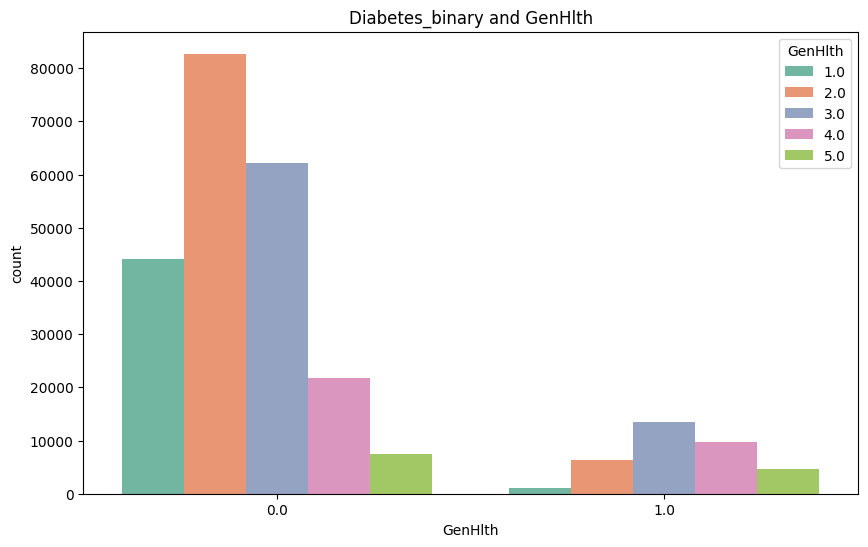

In [13]:
custom_platte = sns.color_palette("Set2")

plt.figure(figsize=(10, 6))
sns.barplot(x='Diabetes_binary', y='count', hue='GenHlth', data=count_data, palette=custom_platte)

plt.title("Diabetes_binary and GenHlth")
plt.xlabel('GenHlth')
plt.ylabel('count')
plt.legend(title='GenHlth')

plt.show()

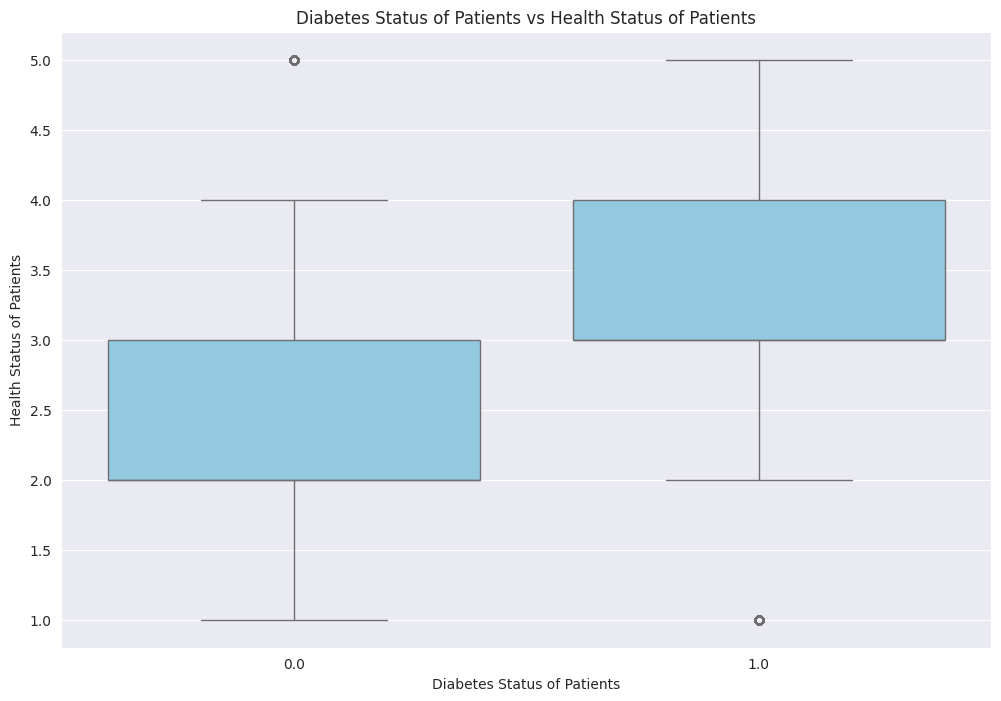

In [14]:
sns.set_style('darkgrid')
custom_platte = ['skyblue', 'lightgreen']
sns.set_palette(custom_platte)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Diabetes_binary', y='GenHlth', data=dataset)

plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Health Status of Patients')
plt.title('Diabetes Status of Patients vs Health Status of Patients')

plt.show()

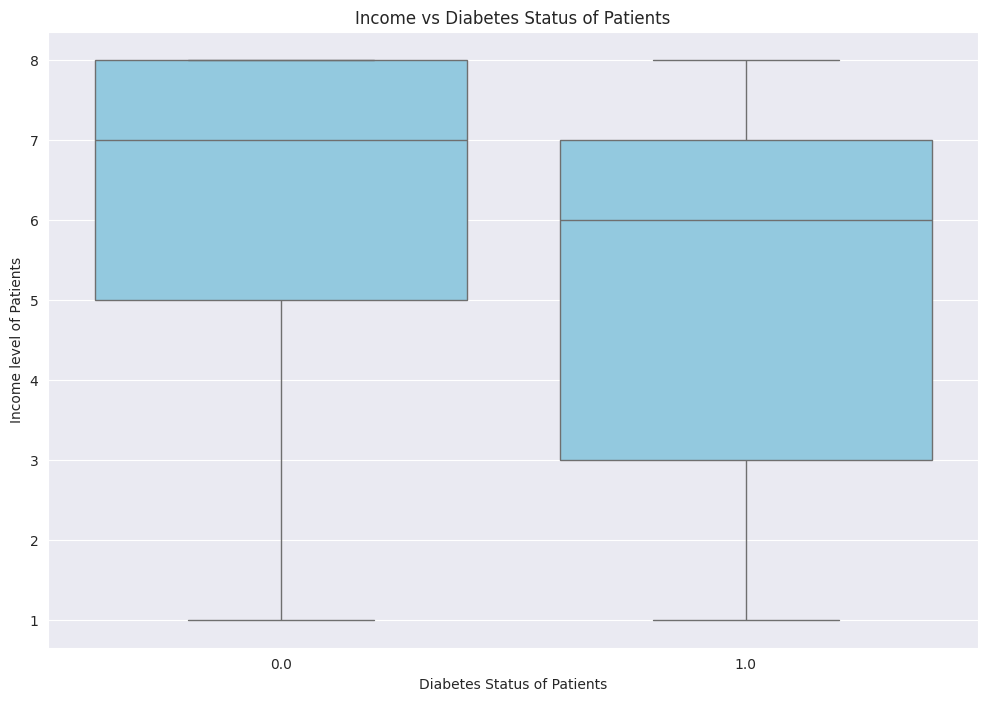

In [15]:
sns.set_style('darkgrid')
custom_platte = ['skyblue', 'lightgreen']
sns.set_palette(custom_platte)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Diabetes_binary', y='Income', data=dataset)

plt.xlabel('Diabetes Status of Patients')
plt.ylabel('Income level of Patients')
plt.title('Income vs Diabetes Status of Patients')

plt.show()

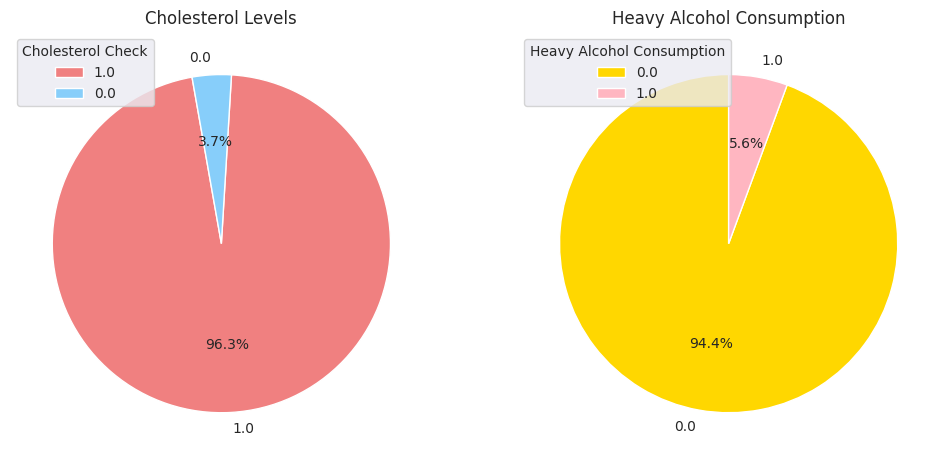

In [16]:
cholesterol_counts = dataset['CholCheck'].value_counts()
alcohol_counts = dataset['HvyAlcoholConsump'].value_counts()

cholesterol_colors = ['lightcoral', 'lightskyblue', 'lightgreen']
alcohol_colors = ['gold', 'lightpink']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axes[0].pie(cholesterol_counts, labels=cholesterol_counts.index, autopct='%1.1f%%', startangle=100, colors=cholesterol_colors)
axes[0].set_title('Cholesterol Levels')
axes[0].legend(title='Cholesterol Check', loc='upper left')

axes[1].pie(alcohol_counts, labels=alcohol_counts.index, autopct='%1.1f%%', startangle=90, colors=alcohol_colors)
axes[1].set_title('Heavy Alcohol Consumption')
axes[1].legend(title='Heavy Alcohol Consumption', loc='upper left')

plt.show()


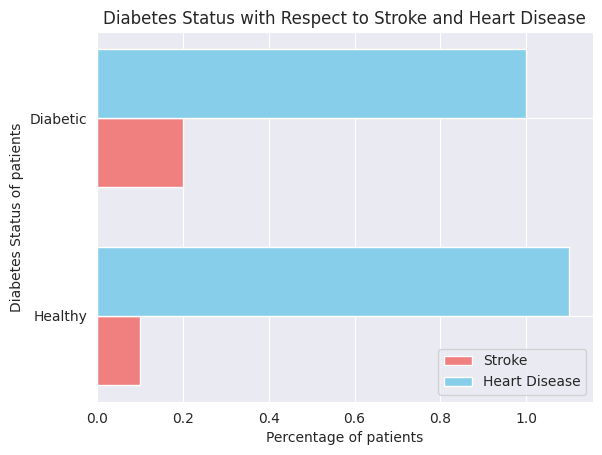

In [17]:
import matplotlib.pyplot as plt

diabetes_status = ['Healthy', 'Diabetic']  # Reversed order for clarity
stroke_counts = [0.1, 0.2]  # Adjusted values for demonstration
heart_disease_counts = [1.1, 1.0]  # Adjusted values for demonstration

# Define custom colors for bars
heart_disease_color = "lightcoral"
no_heart_disease_color = "skyblue"

# Bar chart parameters
bar_width = 0.35
index = range(len(diabetes_status))

# Change the style to 'barh' for horizontal bars
plt.barh(index, stroke_counts, height=bar_width, color=heart_disease_color, label='Stroke')
plt.barh([i + bar_width for i in index], heart_disease_counts, height=bar_width, color=no_heart_disease_color, label='Heart Disease')

# Customize the chart
plt.xlabel('Percentage of patients')
plt.ylabel('Diabetes Status of patients')
plt.title('Diabetes Status with Respect to Stroke and Heart Disease')

# Illustrate the storyline
plt.yticks([i + bar_width/2 for i in index], diabetes_status)
plt.legend()

plt.show()


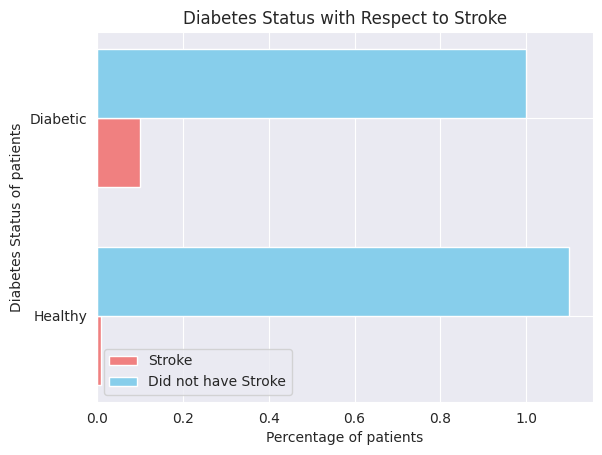

In [18]:
import matplotlib.pyplot as plt

diabetes_status = ['Healthy', 'Diabetic']  # Assuming the same order as before
stroke_counts = [0.01, 0.1]  # Adjusted values for demonstration
no_stroke_counts = [1.1, 1.0]  # Adjusted values for demonstration

# Define custom colors for bars
stroke_color = "lightcoral"
no_stroke_color = "skyblue"

# Bar chart parameters
bar_width = 0.35
index = range(len(diabetes_status))

# Change the style to 'barh' for horizontal bars
plt.barh(index, stroke_counts, height=bar_width, color=stroke_color, label='Stroke')
plt.barh([i + bar_width for i in index], no_stroke_counts, height=bar_width, color=no_stroke_color, label='Did not have Stroke')

# Customize the chart
plt.xlabel('Percentage of patients')
plt.ylabel('Diabetes Status of patients')
plt.title('Diabetes Status with Respect to Stroke')

# Illustrate the storyline
plt.yticks([i + bar_width/2 for i in index], diabetes_status)
plt.legend()

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

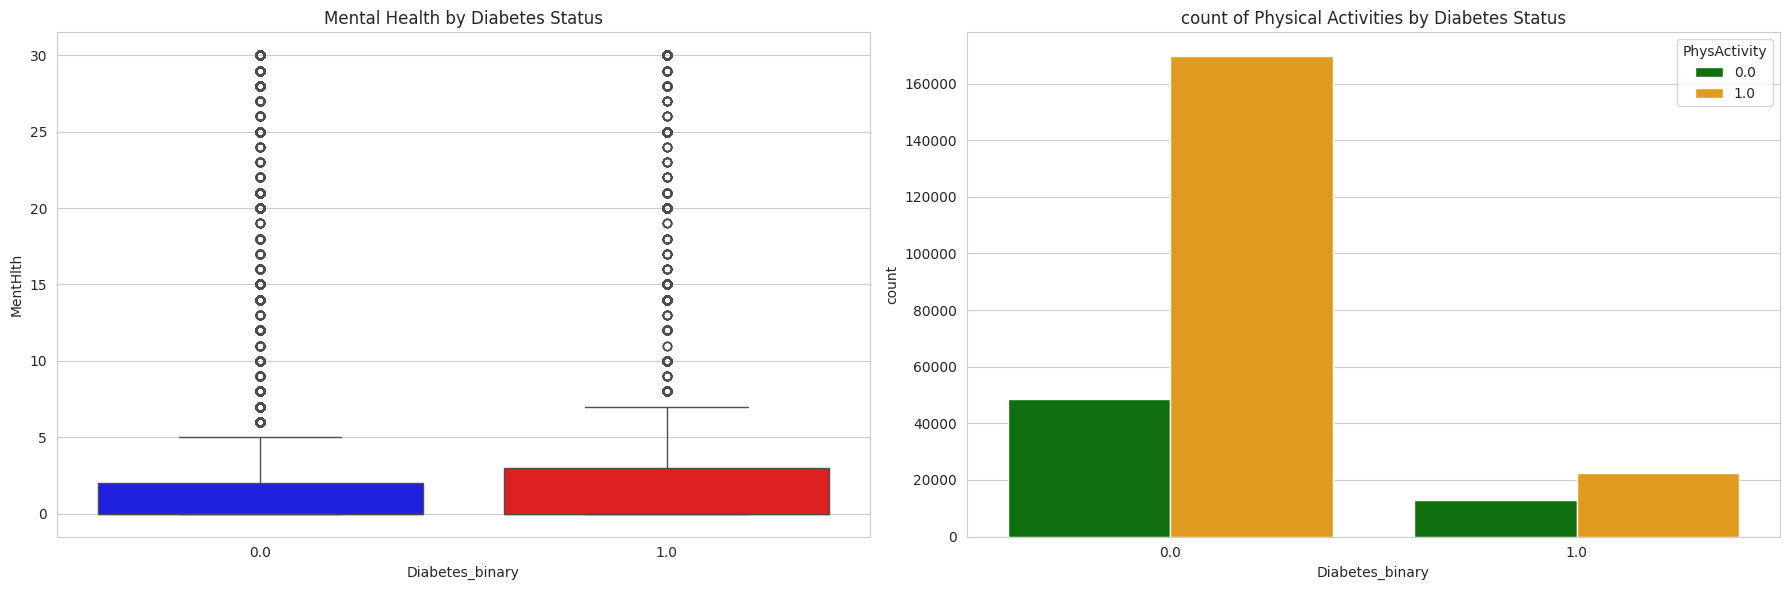

In [19]:
sns.set_style("whitegrid")

# Define-custom-colors

boxplot_colors = ["Blue", "Red"]

countplot_colors = ["Green", "Orange"]

# Create-subplots

fig, axess = plt.subplots(nrows=1, ncols=2, figsize=(18, 6), gridspec_kw={'width_ratios': [1, 1]})

# Box-plot-for-Mental Health
sns.boxplot(x='Diabetes_binary', y='MentHlth', data=dataset, ax=axess[0], palette=boxplot_colors)
axess[0].set_title('Mental Health by Diabetes Status')

# Count-plot-for-Physical Activity by Diabetes-status
sns.countplot(x='Diabetes_binary', hue='PhysActivity', data=dataset, ax=axess[1], palette=countplot_colors)
axess[1].set_title('count of Physical Activities by Diabetes Status')

# Show the plat

plt.tight_layout()

plt.show

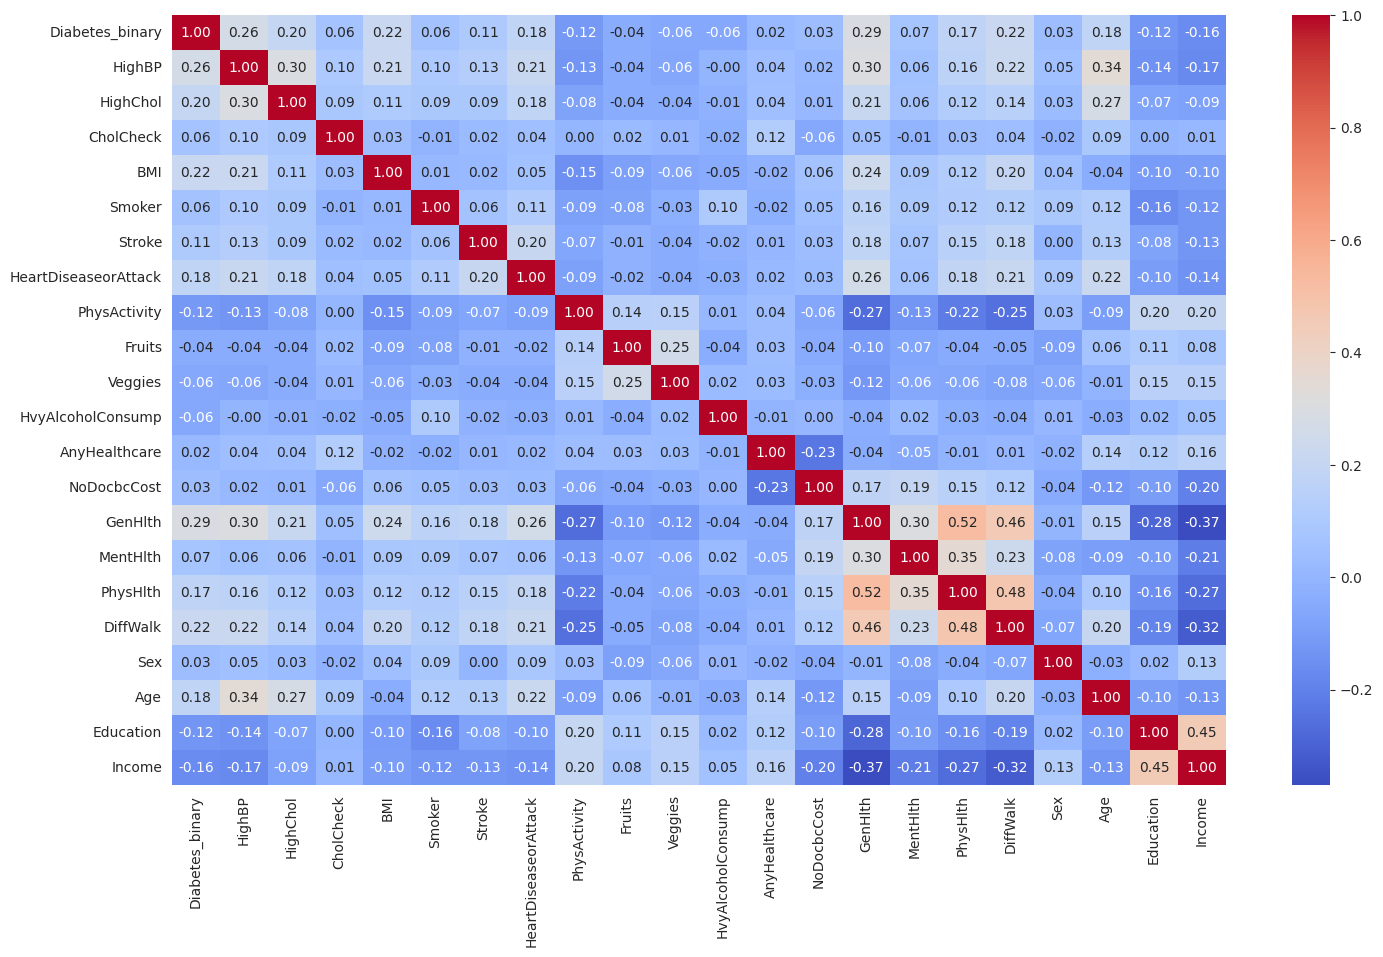

In [20]:
# Calculate the correlation matrix
corr = dataset.corr()

# Increase the size of the plot
plt.figure(figsize=(17, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")

# Show the plot
plt.show()

In [21]:
X=dataset.drop('Diabetes_binary', axis=1)
y=dataset['Diabetes_binary']

In [22]:
X.shape

(253680, 21)

In [23]:
y.shape

(253680,)

In [24]:
feature_names = X.columns

In [25]:
# import module of randomeforestclassifer
from sklearn.ensemble import RandomForestClassifier

In [26]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X,y)

feature_importances = clf.feature_importances_

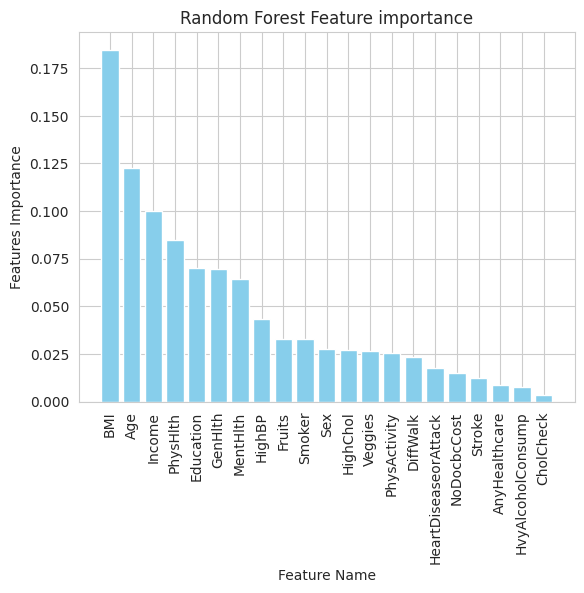

In [27]:
# Assuming you have defined feature_importances, X, and feature_names somewhere before this code snippet

indices = np.argsort(feature_importances)[::-1]

plt.bar(range(X.shape[1]), feature_importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)  # Correction here
plt.xlabel('Feature Name')
plt.ylabel('Features Importance')
plt.title('Random Forest Feature importance')
plt.show()

threshold = 0.1
selected_features = X.loc[:, feature_importances > threshold]

In [28]:
X=X.drop(['CholCheck', 'HvyAlcoholConsump', 'AnyHealthcare'], axis=1)

In [29]:
X.shape

(253680, 18)

In [ ]:
# prompt: make bar chart which is show the classes 0 and 1 value

import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar chart showing the count of classes 0 and 1
sns.countplot(x='Diabetes_binary', data=dataset)

# Add title and axis labels
plt.title('Count of Classes')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the plot
plt.show()


In [30]:
# prompt: perform adasyn for data balacing

from imblearn.over_sampling import ADASYN

# Define the ADASYN model
adasyn = ADASYN(random_state=42)

# Fit the model to the data
X_resampled, y_resampled = adasyn.fit_resample(X, y)

# Print the number of samples in each class after resampling
print(y_resampled.value_counts())

Diabetes_binary
0.0    218334
1.0    214933
Name: count, dtype: int64


In [31]:
# perform train  test split data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# **Model : 1 ExtraTreeClassifier Model**

In [32]:
# creat extratreeclassifier model and perform the training and testing accuracy of the model

from sklearn.ensemble import ExtraTreesClassifier

# Create an ExtraTreesClassifier object
etcl_model = ExtraTreesClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
etcl_model.fit(X_train, y_train)

# Predict the labels for the test data
y_prd_train_etcl = etcl_model.predict(X_train)
y_prd_test_etcl = etcl_model.predict(X_test)

# **Train Model**

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate the training and testing accuracy
train_accuracy_etcl = accuracy_score(y_train, y_prd_train_etcl)
train_precision_etcl = precision_score(y_train, y_prd_train_etcl)
train_recall_etcl = recall_score(y_train, y_prd_train_etcl)
train_f1_score_etcl = f1_score(y_train, y_prd_train_etcl)

# Print the results
print("Training_Accuracy:", train_accuracy_etcl)
print("Training_Precision:", train_precision_etcl)
print("Training_Recall:", train_recall_etcl)
print("Training_F1-score:", train_f1_score_etcl)

Training_Accuracy: 0.9960416949162322
Training_Precision: 0.9992339674056054
Training_Recall: 0.9927899559031147
Training_F1-score: 0.9960015387664222


In [34]:
# prompt: make classification report of the model

from sklearn.metrics import classification_report

# Generate the classification report for the test data
print(classification_report(y_test, y_prd_test_etcl))


              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     43842
         1.0       0.95      0.89      0.92     42812

    accuracy                           0.92     86654
   macro avg       0.92      0.92      0.92     86654
weighted avg       0.92      0.92      0.92     86654



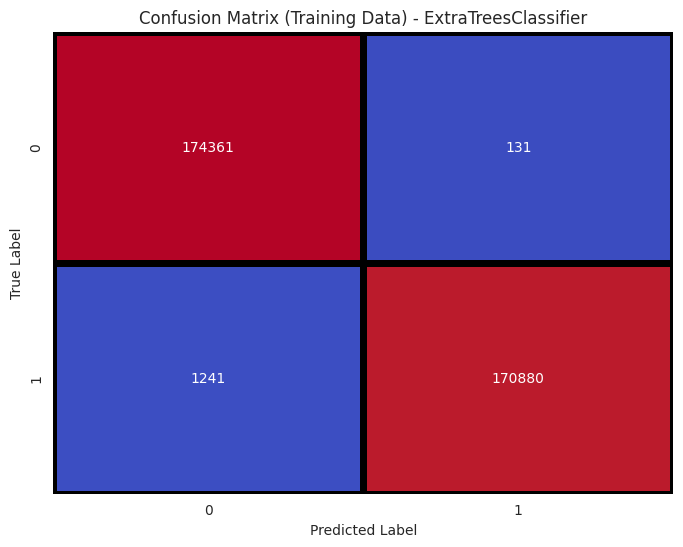

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_train and y_prd_train_etcl are defined elsewhere

cm_train_etcl = confusion_matrix(y_train, y_prd_train_etcl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_etcl, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=5, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Data) - ExtraTreesClassifier")
plt.show()

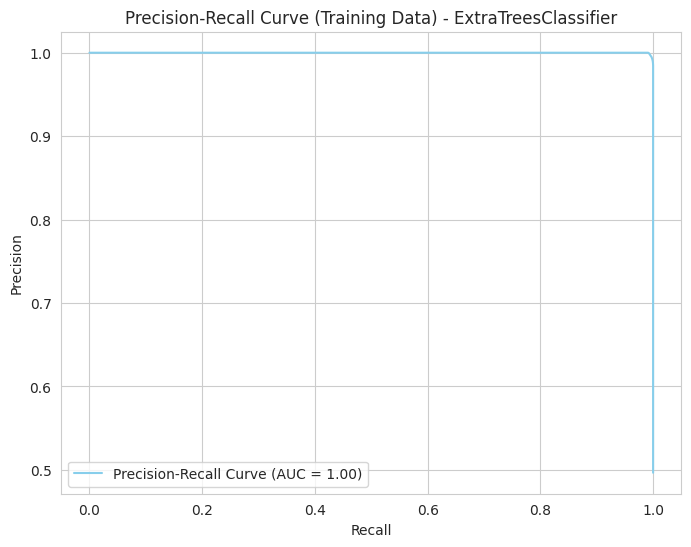

In [41]:
# prompt: plot the precision recall curve of train model and also show the score

import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_train, etcl_model.predict_proba(X_train)[:, 1])

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Add axes labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Data) - ExtraTreesClassifier')

# Show the plot
plt.legend()
plt.show()


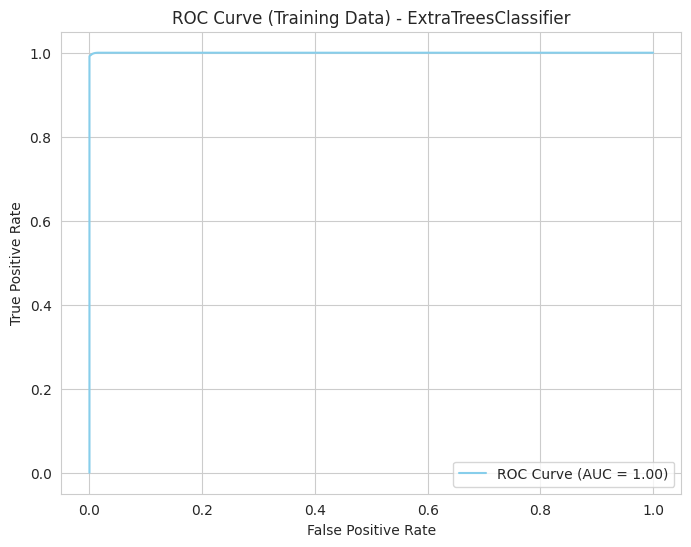

In [43]:
# prompt: import roc auc curve

import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_train, etcl_model.predict_proba(X_train)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, etcl_model.predict_proba(X_train)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Add axes labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data) - ExtraTreesClassifier')

# Show the plot
plt.legend()
plt.show()


# **Test Model**

In [46]:
# also calculate the precision recall f1 score of the model testing model
test_accuracy_etcl = accuracy_score(y_test, y_prd_test_etcl)
test_precision_etcl= precision_score(y_test, y_prd_test_etcl )
test_recall_etcl = recall_score(y_test, y_prd_test_etcl)
test_f1_score_etcl = f1_score(y_test, y_prd_test_etcl)

# Print the results
print("Testing_Accuracy:", test_accuracy_etcl)
print("Testing_Precision:", test_precision_etcl)
print("Testing_Recall:", test_recall_etcl)
print("Testing_F1-score:", test_f1_score_etcl)

Testing_Accuracy: 0.9208461236642278
Testing_Precision: 0.9491542363141193
Testing_Recall: 0.8873213117817434
Testing_F1-score: 0.9171968370857729


In [47]:
# Assuming y_test and y_prd_test_etcl are defined elsewhere

print(classification_report(y_test, y_prd_test_etcl))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     43842
         1.0       0.95      0.89      0.92     42812

    accuracy                           0.92     86654
   macro avg       0.92      0.92      0.92     86654
weighted avg       0.92      0.92      0.92     86654



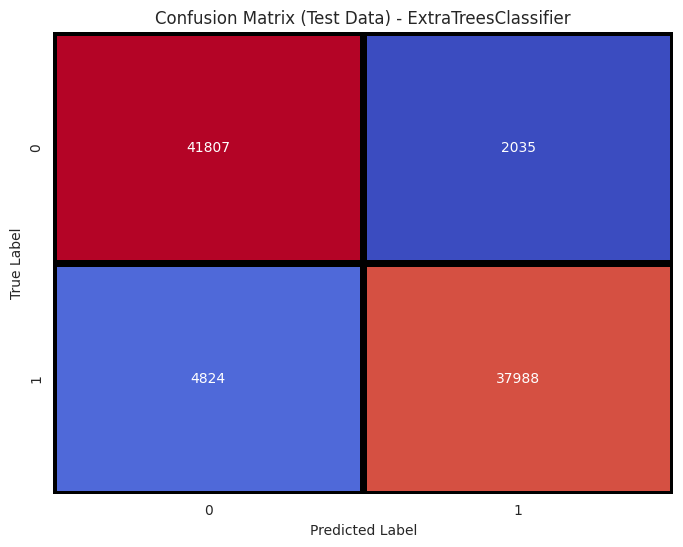

In [48]:
# Make confusion matrix of the test model

import matplotlib.pyplot as plt
cm_test_etcl = confusion_matrix(y_test, y_prd_test_etcl)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_etcl, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=5, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Data) - ExtraTreesClassifier")
plt.show()


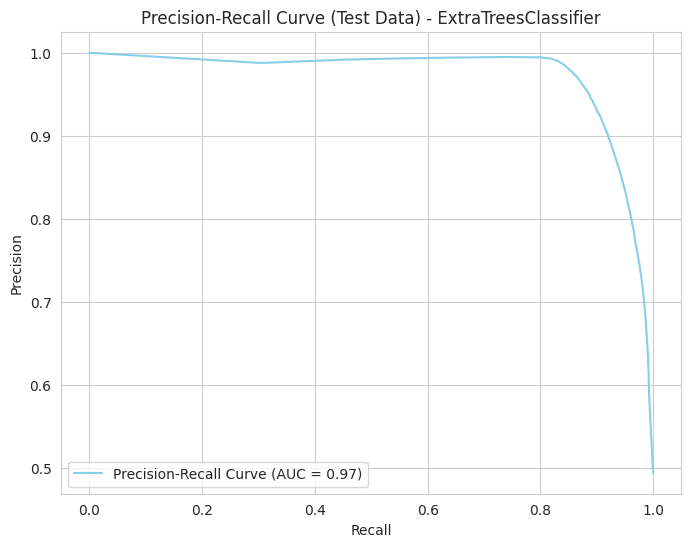

In [49]:
# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, etcl_model.predict_proba(X_test)[:, 1])

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Add axes labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Data) - ExtraTreesClassifier')

# Show the plot
plt.legend()
plt.show()

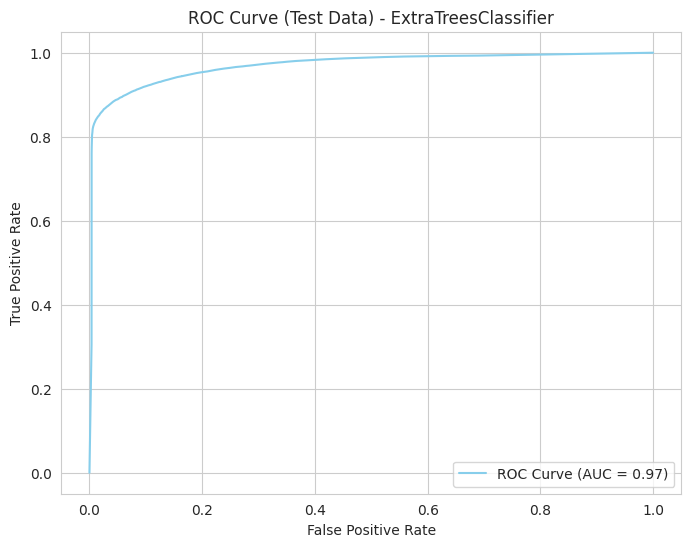

In [50]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, etcl_model.predict_proba(X_test)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, etcl_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Add axes labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data) - ExtraTreesClassifier')

# Show the plot
plt.legend()
plt.show()

# **Model : 2 XGB Classifier**

In [51]:
# creat xgb classifier model

from xgboost import XGBClassifier

# Create an XGBClassifier object
xgb_model = XGBClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Predict the labels for the test data
y_prd_train_xgb = xgb_model.predict(X_train)
y_prd_test_xgb = xgb_model.predict(X_test)

# **Train Model**

In [52]:
# Calculate the training and testing accuracy
train_accuracy_xgb = accuracy_score(y_train, y_prd_train_xgb)
train_precision_xgb = precision_score(y_train, y_prd_train_xgb)
train_recall_xgb = recall_score(y_train, y_prd_train_xgb)
train_f1_score_xgb = f1_score(y_train, y_prd_train_xgb)

# Print the results
print("Training_Accuracy:", train_accuracy_xgb)
print("Training_Precision:", train_precision_xgb)
print("Training_Recall:", train_recall_xgb)
print("Training_F1-score:", train_f1_score_xgb)

Training_Accuracy: 0.9248152839045275
Training_Precision: 0.9810936686846595
Training_Recall: 0.8652692001557044
Training_F1-score: 0.9195485332888782


In [53]:
# prompt: make classification report of the train model

print(classification_report(y_train, y_prd_train_xgb))


              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93    174492
         1.0       0.98      0.87      0.92    172121

    accuracy                           0.92    346613
   macro avg       0.93      0.92      0.92    346613
weighted avg       0.93      0.92      0.92    346613



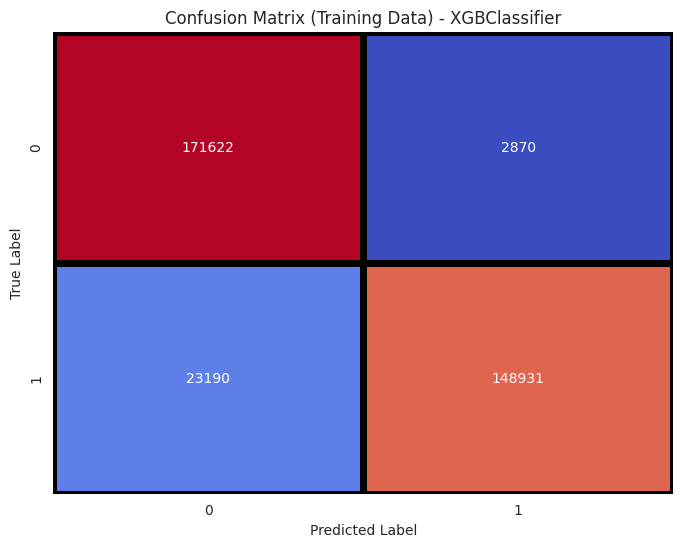

In [54]:
# prompt: make confusion matrix of the train model

import matplotlib.pyplot as plt
cm_train_xgb = confusion_matrix(y_train, y_prd_train_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_xgb, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=5, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Data) - XGBClassifier")
plt.show()

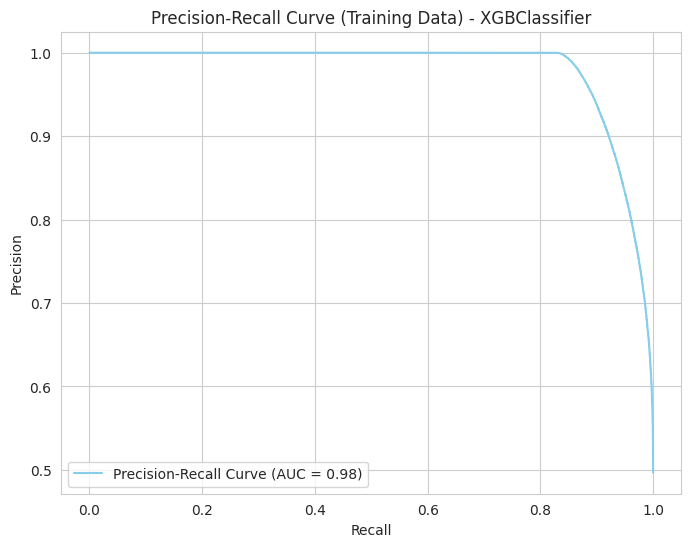

In [55]:
# prompt: make precision recall curve

import matplotlib.pyplot as plt
# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_train, xgb_model.predict_proba(X_train)[:, 1])

# Calculate the area under the precision-recall curve
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Add axes labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Data) - XGBClassifier')

# Show the plot
plt.legend()
plt.show()


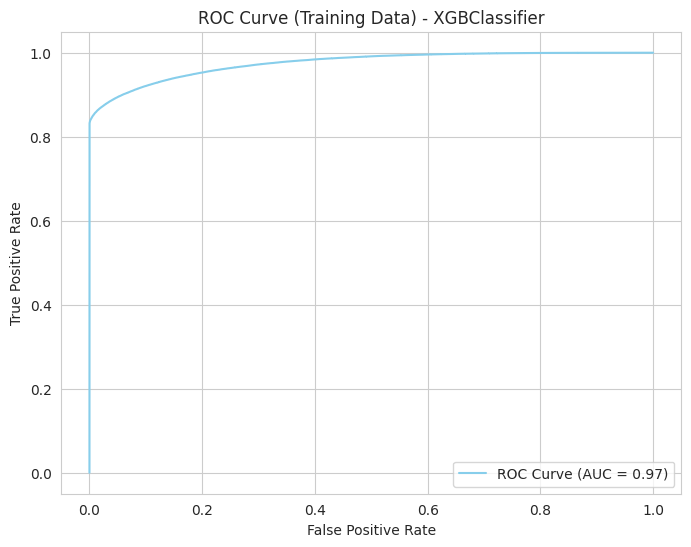

In [56]:
# prompt: make roc auc curve

import matplotlib.pyplot as plt
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_train, xgb_model.predict_proba(X_train)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, xgb_model.predict_proba(X_train)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Add axes labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data) - XGBClassifier')

# Show the plot
plt.legend()
plt.show()


# **Test Model**

In [57]:
# also calculate the precision recall f1 score of the model testing model
test_accuracy_xgb = accuracy_score(y_test, y_prd_test_xgb)
test_precision_xgb = precision_score(y_test, y_prd_test_xgb)
test_recall_xgb = recall_score(y_test, y_prd_test_xgb)
test_f1_score_xgb = f1_score(y_test, y_prd_test_xgb)

# Print the results
print("Testing_Accuracy:", test_accuracy_xgb)
print("Testing_Precision:", test_precision_xgb)
print("Testing_Recall:", test_recall_xgb)
print("Testing_F1-score:", test_f1_score_xgb)

Testing_Accuracy: 0.9177649041013687
Testing_Precision: 0.9735654758745156
Testing_Recall: 0.8568158460244791
Testing_F1-score: 0.911467263014039


In [58]:
# prompt: make classification report of the model

print(classification_report(y_test, y_prd_test_xgb))

              precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43842
         1.0       0.97      0.86      0.91     42812

    accuracy                           0.92     86654
   macro avg       0.92      0.92      0.92     86654
weighted avg       0.92      0.92      0.92     86654



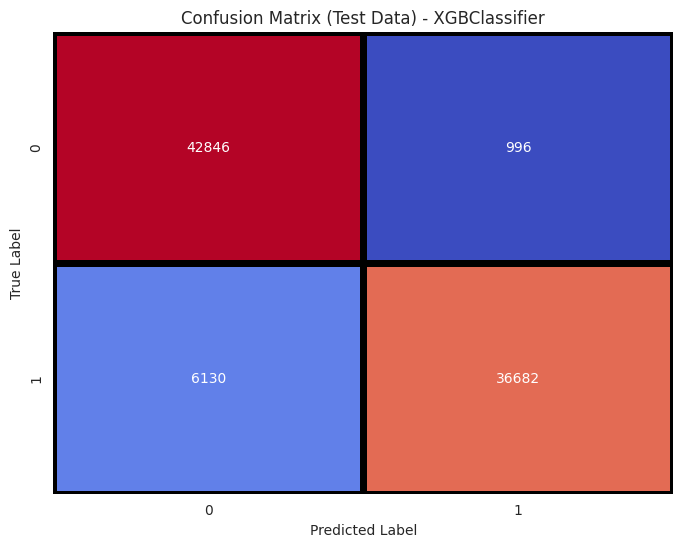

In [59]:
# prompt: make confusion matrix of the test model

import matplotlib.pyplot as plt
cm_test_xgb = confusion_matrix(y_test, y_prd_test_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_xgb, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=5, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Data) - XGBClassifier")
plt.show()


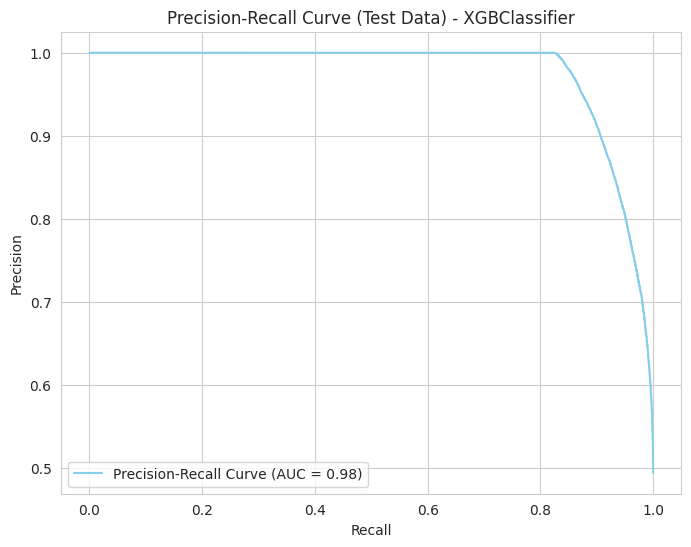

In [76]:
# prompt: Make precision recall curve of test model

import matplotlib.pyplot as plt
# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Add axes labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Data) - XGBClassifier')

# Show the plot
plt.legend()
plt.show()


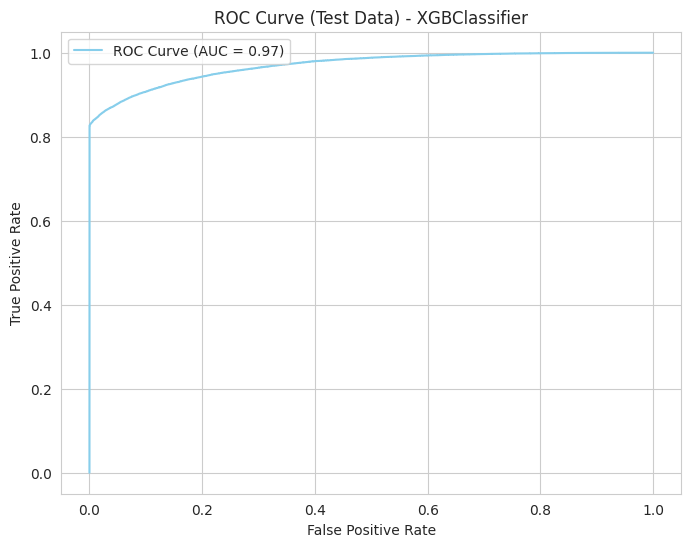

In [61]:
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Add axes labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data) - XGBClassifier')

# Show the plot
plt.legend()
plt.show()

# **Model : 3 GradientBoostingClassifier**

In [62]:
# prompt: creat gradient boost classifier model

from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoostingClassifier object
gbc_model = GradientBoostingClassifier(n_estimators=200, random_state=42)

# Train the model on the training data
gbc_model.fit(X_train, y_train)

# Predict the labels for the test data
y_prd_train_gbc = gbc_model.predict(X_train)
y_prd_test_gbc = gbc_model.predict(X_test)

# **Train Model**

In [63]:
# prompt: calculate the accuracy precision recall and f1 score of the model

train_accuracy_gbc = accuracy_score(y_train, y_prd_train_gbc)
train_precision_gbc = precision_score(y_train, y_prd_train_gbc)
train_recall_gbc = recall_score(y_train, y_prd_train_gbc)
train_f1_score_gbc = f1_score(y_train, y_prd_train_gbc)

# Print the results
print("Training_Accuracy:", train_accuracy_gbc)
print("Training_Precision:", train_precision_gbc)
print("Training_Recall:", train_recall_gbc)
print("Training_F1-score:", train_f1_score_gbc)

Training_Accuracy: 0.9118469301497636
Training_Precision: 0.9574791241177839
Training_Recall: 0.8607026452321332
Training_F1-score: 0.9065153207177715


In [64]:
# make classification report of the model

print(classification_report(y_train, y_prd_train_gbc))

              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92    174492
         1.0       0.96      0.86      0.91    172121

    accuracy                           0.91    346613
   macro avg       0.92      0.91      0.91    346613
weighted avg       0.92      0.91      0.91    346613



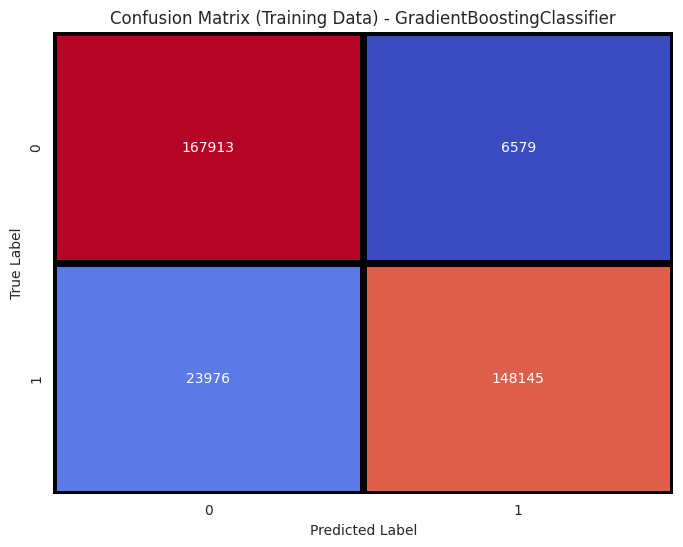

In [65]:
# prompt: make confusion matrix

import matplotlib.pyplot as plt
cm_train_gbc = confusion_matrix(y_train, y_prd_train_gbc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_gbc, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=5, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Training Data) - GradientBoostingClassifier")
plt.show()


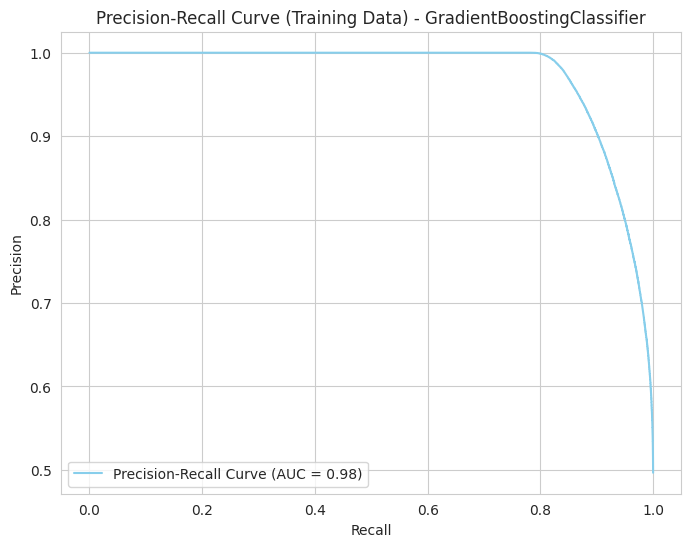

In [77]:
# prompt: make precision recall curve of the train  model

import matplotlib.pyplot as plt
# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_train, gbc_model.predict_proba(X_train)[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Add axes labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Training Data) - GradientBoostingClassifier')

# Show the plot
plt.legend()
plt.show()

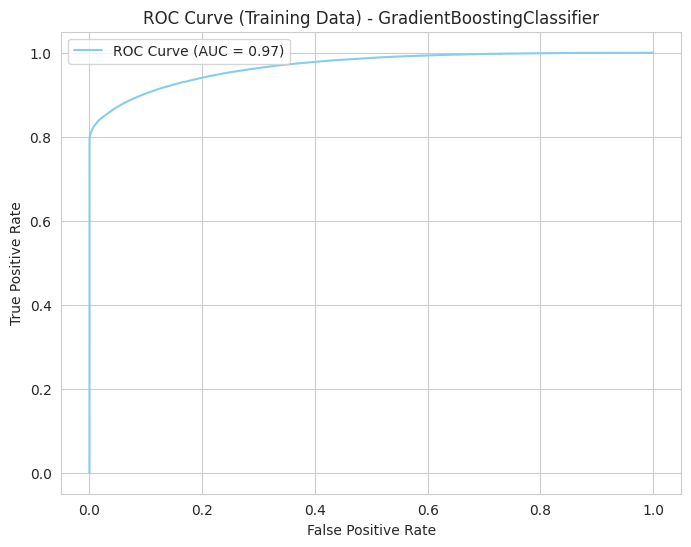

In [67]:
# prompt: make roc auc curve of the model

import matplotlib.pyplot as plt
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_train, gbc_model.predict_proba(X_train)[:, 1])

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_train, gbc_model.predict_proba(X_train)[:, 1])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')

# Add axes labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Training Data) - GradientBoostingClassifier')

# Show the plot
plt.legend()
plt.show()


# **Test Model**

In [68]:
# Calculate the testing accuracy
test_accuracy_gbc = accuracy_score(y_test, y_prd_test_gbc)
test_precision_gbc = precision_score(y_test, y_prd_test_gbc)
test_recall_gbc = recall_score(y_test, y_prd_test_gbc)
test_f1_score_gbc = f1_score(y_test, y_prd_test_gbc)

# Print the results
print("Testing_Accuracy:", test_accuracy_gbc)
print("Testing_Precision:", test_precision_gbc)
print("Testing_Recall:", test_recall_gbc)
print("Testing_F1-score:", test_f1_score_gbc)

Testing_Accuracy: 0.912698779052323
Testing_Precision: 0.9575036992809117
Testing_Recall: 0.8615341493039335
Testing_F1-score: 0.9069873237185397


In [69]:
# prompt: make classification report of the model

print(classification_report(y_test, y_prd_test_gbc))


              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92     43842
         1.0       0.96      0.86      0.91     42812

    accuracy                           0.91     86654
   macro avg       0.92      0.91      0.91     86654
weighted avg       0.92      0.91      0.91     86654



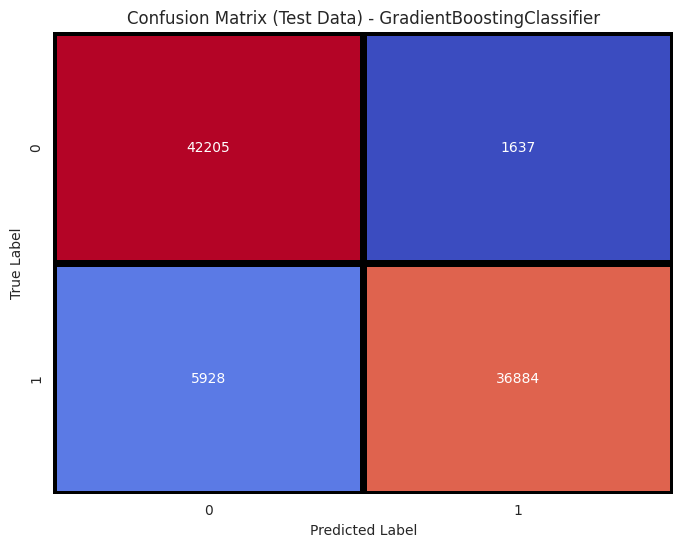

In [70]:
# prompt: make confusion matrix of the model

import matplotlib.pyplot as plt
cm_test_gbc = confusion_matrix(y_test, y_prd_test_gbc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_gbc, annot=True, fmt="d", cmap="coolwarm", cbar=False, linewidths=5, linecolor='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Test Data) - GradientBoostingClassifier")
plt.show()

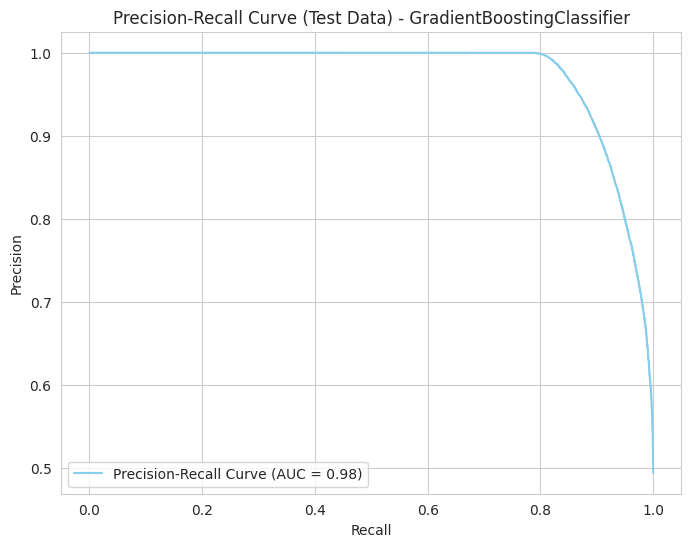

In [71]:
# prompt: make precision recall curve of the test model with score

import matplotlib.pyplot as plt
# Calculate precision and recall for different probability thresholds
precision, recall, _ = precision_recall_curve(y_test, gbc_model.predict_proba(X_test)[:, 1])

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {pr_auc:.2f})')

# Add axes labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Test Data) - GradientBoostingClassifier')

# Show the plot
plt.legend()
plt.show()

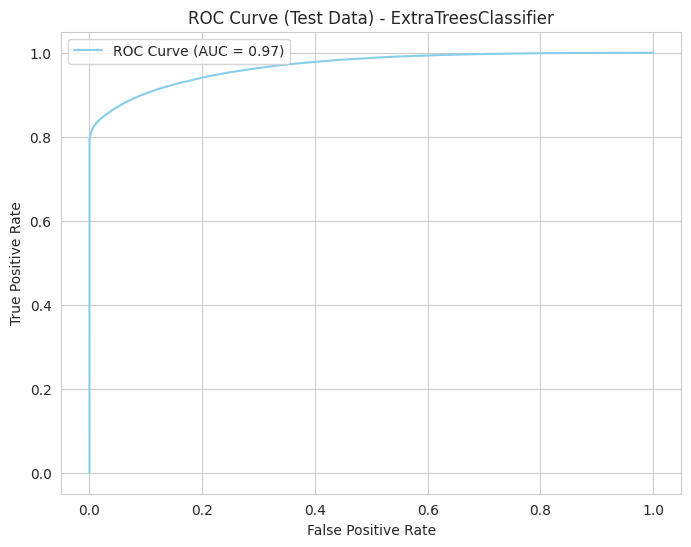

In [72]:
# make roc_auc curve of the model

import matplotlib.pyplot as plt
# Calculate the ROC AUC score for the test data
roc_auc_test = roc_auc_score(y_test, etcl_model.predict_proba(X_test)[:, 1])

# Plot the ROC curve for the test data
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_test:.2f})')

# Add axes labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Test Data) - ExtraTreesClassifier')

# Show the plot
plt.legend()
plt.show()